In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Load datasets
customers = pd.read_csv("olist_customers_dataset.csv")
geolocation = pd.read_csv('olist_geolocation_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
product_category_translation = pd.read_csv('product_category_name_translation.csv')

C:\Users\User\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\User\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
C:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# ------- 9 product_category_translation
print("\nproduct_category_translation")
product_category_translation.shape



product_category_translation


(71, 2)

In [3]:
product_category_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [4]:
product_category_translation.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [5]:
product_category_translation = product_category_translation.dropna()

In [6]:
product_category_translation.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [7]:
# Create a dictionary for mapping from 'product_category_name' to 'product_category_name_english'
translation_map = dict(zip(product_category_translation.product_category_name, 
                           product_category_translation.product_category_name_english))

# a function to replace the 'product_category_name' in Portuguese to English
def replace_category_with_translation(df, translation_map):
    if 'product_category_name' in product_category_translation.columns:
        product_category_translation['product_category_name'].replace(
            translation_map, inplace=True)
    return product_category_translation

In [8]:
state_mapping = {
    'SP': 'São Paulo',
    'RN': 'Rio Grande do Norte',
    'AC': 'Acre',
    'RJ': 'Rio de Janeiro',
    'ES': 'Espírito Santo',
    'MG': 'Minas Gerais',
    'BA': 'Bahia',
    'SE': 'Sergipe',
    'PE': 'Pernambuco',
    'AL': 'Alagoas',
    'PB': 'Paraíba',
    'CE': 'Ceará',
    'PI': 'Piauí',
    'MA': 'Maranhão',
    'PA': 'Pará',
    'AP': 'Amapá',
    'AM': 'Amazonas',
    'RR': 'Roraima',
    'DF': 'Distrito Federal',
    'GO': 'Goiás',
    'RO': 'Rondônia',
    'TO': 'Tocantins',
    'MT': 'Mato Grosso',
    'MS': 'Mato Grosso do Sul',
    'RS': 'Rio Grande do Sul',
    'PR': 'Paraná',
    'SC': 'Santa Catarina'
}


In [9]:
customers['customer_state'] = customers['customer_state'].replace(state_mapping)
sellers['seller_state'] = sellers['seller_state'].replace(state_mapping)
geolocation['geolocation_state'] = geolocation['geolocation_state'].replace(state_mapping)


In [10]:
# ------- 1 customers
print("\nCustomer")
# Check the shape of the dataframe
customers.shape


Customer


(99441, 5)

In [11]:
# View the first few rows of the dataframe
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,São Paulo
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,São Paulo
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,São Paulo
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,São Paulo
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,São Paulo


In [12]:
customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [13]:
# Check for missing data
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [14]:
# Remove missing data
customers = customers.dropna()

In [15]:
customers.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

In [16]:
customers.duplicated().sum()

0

In [17]:
# View descriptive statistics of the dataframe
customers.customer_id.describe()

count                                99441
unique                               99441
top       06b8999e2fba1a1fbc88172c00ba8bc7
freq                                     1
Name: customer_id, dtype: object

Text(0.5, 0, 'Number of Customers')

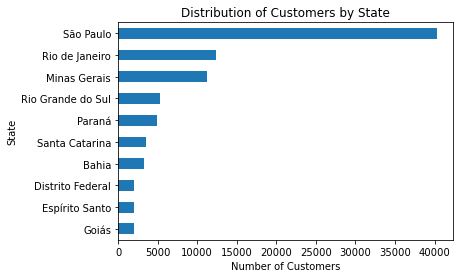

In [18]:
# to find the distribution of customers based on their state
customers.groupby(['customer_state'])['customer_unique_id'].nunique().sort_values(
    ascending=False)[:10].iloc[::-1].plot(kind = 'barh')
plt.title("Distribution of Customers by State")
plt.ylabel("State")
plt.xlabel("Number of Customers")

Text(0.5, 0, 'Number of Customers')

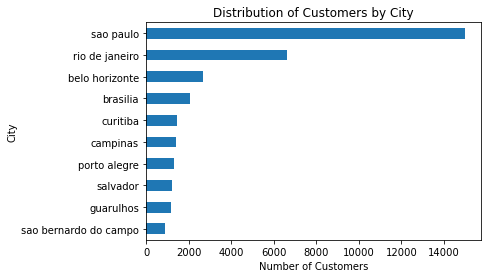

In [19]:
# to find the distribution of customers based on their city
customers.groupby(['customer_city'])['customer_unique_id'].nunique().sort_values(
    ascending=False)[:10].iloc[::-1].plot(kind = 'barh')
plt.title("Distribution of Customers by City")
plt.ylabel("City")
plt.xlabel("Number of Customers")

In [20]:
# ------- 2 geolocation
print("\nLocation")
geolocation.shape


Location


(1000163, 5)

In [21]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,São Paulo
1,1046,-23.546081,-46.644820,sao paulo,São Paulo
2,1046,-23.546129,-46.642951,sao paulo,São Paulo
3,1041,-23.544392,-46.639499,sao paulo,São Paulo
4,1035,-23.541578,-46.641607,sao paulo,São Paulo


In [22]:
geolocation.dtypes

geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object

In [23]:
geolocation.geolocation_state.unique()

array(['São Paulo', 'Rio Grande do Norte', 'Acre', 'Rio de Janeiro',
       'Espírito Santo', 'Minas Gerais', 'Bahia', 'Sergipe', 'Pernambuco',
       'Alagoas', 'Paraíba', 'Ceará', 'Piauí', 'Maranhão', 'Pará',
       'Amapá', 'Amazonas', 'Roraima', 'Distrito Federal', 'Goiás',
       'Rondônia', 'Tocantins', 'Mato Grosso', 'Mato Grosso do Sul',
       'Rio Grande do Sul', 'Paraná', 'Santa Catarina'], dtype=object)

In [24]:
geolocation.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [25]:
geolocation = geolocation.dropna()

In [26]:
# finding number of redundant rows
geolocation.geolocation_zip_code_prefix.duplicated().sum()

981148

In [27]:
geolocation.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [28]:
# finding number of redundant rows
geolocation.geolocation_lat.duplicated().sum()

282803

In [29]:
geolocation.geolocation_lng.duplicated().sum()

282550

In [30]:
# Filter rows that are duplicated based on 'geolocation_zip_code_prefix'
duplicate_rows = geolocation[geolocation.duplicated(subset='geolocation_zip_code_prefix', keep=False)]

# Print the duplicate rows
duplicate_rows

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,São Paulo
1,1046,-23.546081,-46.644820,sao paulo,São Paulo
2,1046,-23.546129,-46.642951,sao paulo,São Paulo
3,1041,-23.544392,-46.639499,sao paulo,São Paulo
4,1035,-23.541578,-46.641607,sao paulo,São Paulo
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,Rio Grande do Sul
1000159,99900,-27.877125,-52.224882,getulio vargas,Rio Grande do Sul
1000160,99950,-28.071855,-52.014716,tapejara,Rio Grande do Sul
1000161,99980,-28.388932,-51.846871,david canabarro,Rio Grande do Sul


In [31]:
# Calculate Q1, Q3, and IQR for latitude
Q1_lat = geolocation['geolocation_lat'].quantile(0.25)
Q3_lat = geolocation['geolocation_lat'].quantile(0.75)
IQR_lat = Q3_lat - Q1_lat

# Define bounds
lower_bound_lat = Q1_lat - 1.5 * IQR_lat
upper_bound_lat = Q3_lat + 1.5 * IQR_lat

# Identify outliers
outliers_lat = geolocation[(geolocation['geolocation_lat'] < lower_bound_lat) | (geolocation['geolocation_lat'] 
                                                                                 > upper_bound_lat)]
outliers_lat


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
250816,11200,-8.275689,-35.965615,caruara,São Paulo
302630,13355,-12.993852,-38.480882,cardeal,São Paulo
304242,13375,-5.754127,-39.627933,mombuca,São Paulo
332933,14185,-14.414915,-42.874718,candia,São Paulo
333157,14185,-14.411892,-42.871632,candia,São Paulo
...,...,...,...,...,...
997877,99440,-29.089375,-53.223443,salto do jacui,Rio Grande do Sul
997883,99440,-29.087320,-53.216383,salto do jacui,Rio Grande do Sul
999082,99718,-30.855193,-51.800950,paulo bento,Rio Grande do Sul
999481,99870,-29.815148,-51.143162,sao jose do ouro,Rio Grande do Sul


In [32]:
# Calculate Q1, Q3, and IQR for longitude
Q1_lng = geolocation['geolocation_lng'].quantile(0.25)
Q3_lng = geolocation['geolocation_lng'].quantile(0.75)
IQR_lng = Q3_lng - Q1_lng

# Define bounds
lower_bound_lng = Q1_lng - 1.5 * IQR_lng
upper_bound_lng = Q3_lng + 1.5 * IQR_lng

# Identify outliers
outliers_lng = geolocation[(geolocation['geolocation_lng'] < lower_bound_lng) | (geolocation['geolocation_lng'] 
                                                                                 > upper_bound_lng)]
outliers_lng


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
250816,11200,-8.275689,-35.965615,caruara,São Paulo
387565,18243,28.008978,-15.536867,bom retiro da esperanca,São Paulo
399300,19274,-10.893066,-61.932123,primavera,São Paulo
502492,27165,-8.068203,-34.893333,sao jose do turvo,Rio de Janeiro
502745,27165,-15.640132,-56.041370,sao jose do turvo,Rio de Janeiro
...,...,...,...,...,...
996197,99010,-28.622892,-56.026167,passo fundo,Rio Grande do Sul
996198,99010,-28.623859,-56.028473,passo fundo,Rio Grande do Sul
996224,99010,-28.622810,-56.025688,passo fundo,Rio Grande do Sul
996249,99010,-28.622629,-56.025312,passo fundo,Rio Grande do Sul


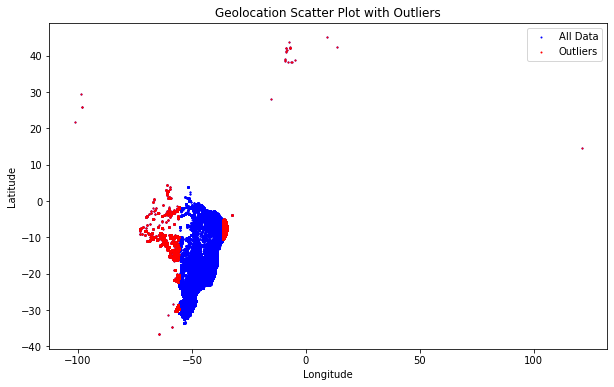

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(geolocation['geolocation_lng'], geolocation['geolocation_lat'], c='blue', s=1, label='All Data')
plt.scatter(outliers_lng['geolocation_lng'], outliers_lng['geolocation_lat'], c='red', s=1, label='Outliers')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.title('Geolocation Scatter Plot with Outliers')
plt.show()


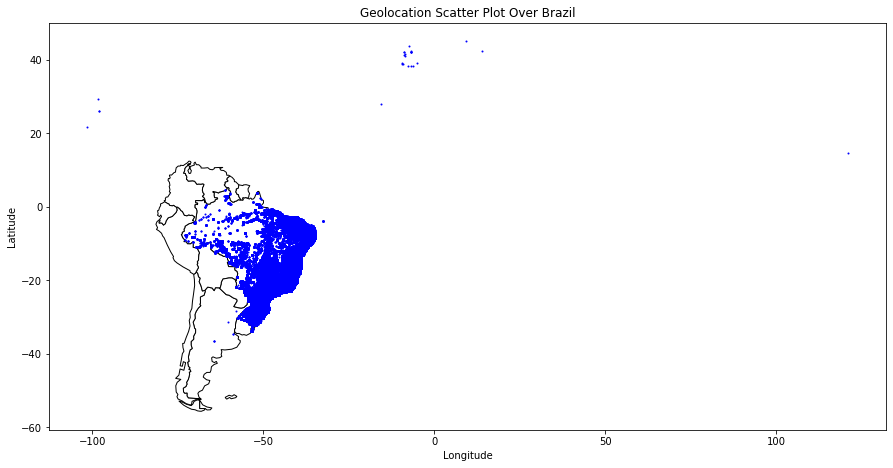

In [34]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load a map of the world
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter for South America, to zoom into Brazil
ax = world[world.continent == "South America"].plot(color="white", edgecolor="black", figsize=(15, 10))

# Plot the geolocation data on top
plt.scatter(geolocation['geolocation_lng'], geolocation['geolocation_lat'], s=1, c='blue')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geolocation Scatter Plot Over Brazil')
plt.show()


In [35]:
# Filter based on bounding box
filtered_geolocation = geolocation[
    (geolocation['geolocation_lat'] > -33) & 
    (geolocation['geolocation_lat'] < 5) & 
    (geolocation['geolocation_lng'] > -74) & 
    (geolocation['geolocation_lng'] < -35)
]


In [36]:
removed_points = len(geolocation) - len(filtered_geolocation)
print(f"Number of points removed: {removed_points}")


Number of points removed: 11947


In [37]:
# Find indexes of rows outside the bounding box
indexes_to_remove = geolocation[
    (geolocation['geolocation_lat'] <= -33) | 
    (geolocation['geolocation_lat'] >= 5) | 
    (geolocation['geolocation_lng'] <= -74) | 
    (geolocation['geolocation_lng'] >= -35)
].index

# Drop these rows from geolocation DataFrame
geolocation.drop(indexes_to_remove, inplace=True)

In [38]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 988216 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  988216 non-null  int64  
 1   geolocation_lat              988216 non-null  float64
 2   geolocation_lng              988216 non-null  float64
 3   geolocation_city             988216 non-null  object 
 4   geolocation_state            988216 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 45.2+ MB


In [39]:
geolocation.shape

(988216, 5)

In [40]:
geolocation.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,988216.000000,988216.000000,988216.000000
mean,36359.883847,-21.331467,-46.524998
std,30661.311543,5.551105,4.097086
min,1001.000000,-32.569765,-72.930746
25%,11030.000000,-23.606481,-48.612240
50%,26061.000000,-22.927450,-46.643059
75%,64090.000000,-20.152309,-43.899099
max,99990.000000,4.482242,-35.000022


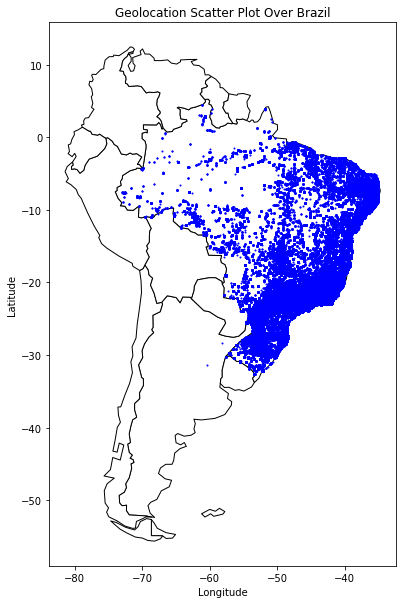

In [41]:
# Load a map of the world
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter for South America, to zoom into Brazil
ax = world[world.continent == "South America"].plot(color="white", edgecolor="black", figsize=(15, 10))

# Plot the geolocation data on top
plt.scatter(geolocation['geolocation_lng'], geolocation['geolocation_lat'], s=1, c='blue')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geolocation Scatter Plot Over Brazil')
plt.show()


In [42]:
# ------- 3 order_items
print("\nOrder_items")
order_items.shape


Order_items


(112650, 7)

In [43]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [114]:
order_items.tail()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72
112649,fffe41c64501cc87c801fd61db3f6244,1,350688d9dc1e75ff97be326363655e01,f7ccf836d21b2fb1de37564105216cc1,2018-06-12 17:10:13,43.00,12.79


In [44]:
order_items.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [45]:
order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [46]:
order_items = order_items.dropna()

In [47]:
order_items.duplicated().sum()

0

In [48]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [49]:
order_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


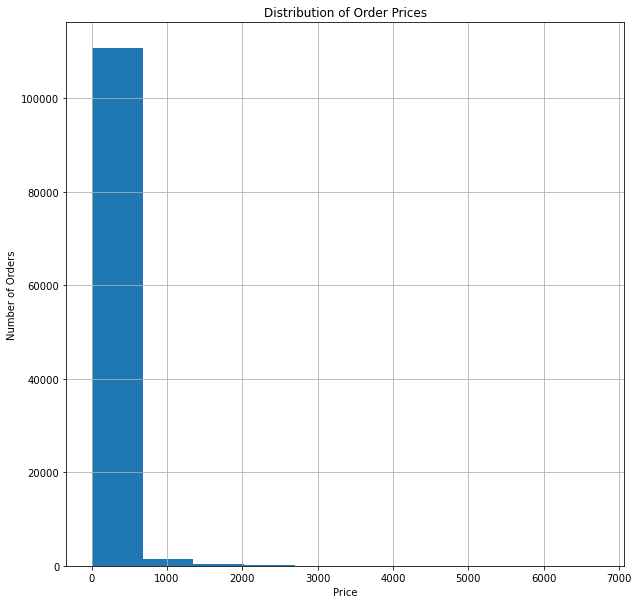

In [50]:
# Plotting the distribution of prices
order_items['price'].hist(bins=10, figsize=(10,10))
plt.title("Distribution of Order Prices")
plt.xlabel("Price")
plt.ylabel("Number of Orders")
plt.show()

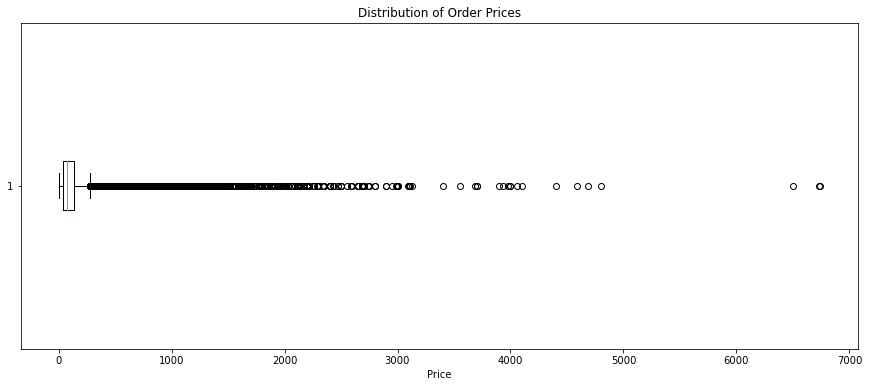

In [113]:
# box plot
plt.figure(figsize=(15,6))
plt.boxplot(order_items['price'], vert=False)  # The vert=False argument makes it horizontal
plt.title("Distribution of Order Prices")
plt.xlabel("Price")
plt.show()

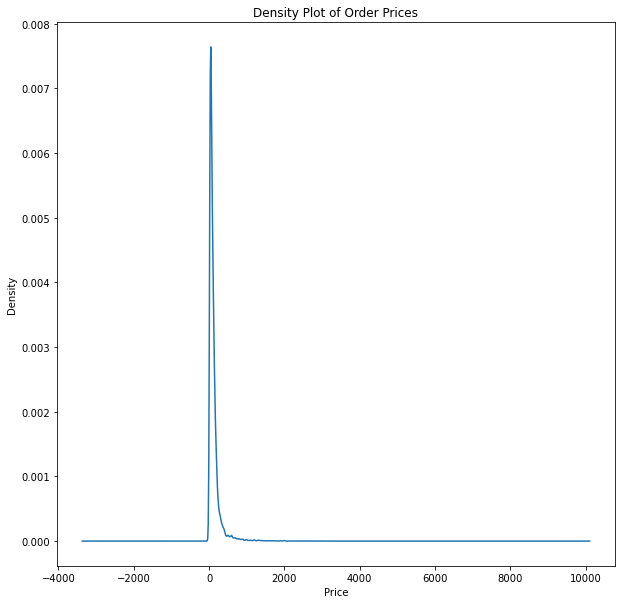

In [101]:
# Density Plot (Kernel Density Estimate)
order_items['price'].plot(kind='kde', figsize=(10,10))
plt.title("Density Plot of Order Prices")
plt.xlabel("Price")
plt.show()

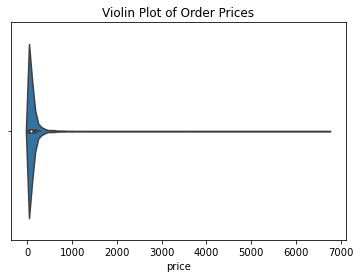

In [103]:
# violin plot
sns.violinplot(x=order_items['price'])
plt.title("Violin Plot of Order Prices")
plt.show()

In [51]:
# ------- 4 payments
print("\nPayments")
payments.shape


Payments


(103886, 5)

In [52]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [53]:
payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [54]:
payments = payments.dropna()

In [55]:
# calculate duplicate 
payments.duplicated().sum()

0

In [56]:
# remove unused row
payments.drop('payment_sequential', axis=1, inplace=True)

In [57]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 4 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_type          103886 non-null  object 
 2   payment_installments  103886 non-null  int64  
 3   payment_value         103886 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [115]:
payments.payment_type.unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

In [58]:
payments.describe()

,payment_installments,payment_value
count,103886.000000,103886.000000
mean,2.853349,154.100380
std,2.687051,217.494064
min,0.000000,0.000000
25%,1.000000,56.790000
50%,1.000000,100.000000
75%,4.000000,171.837500
max,24.000000,13664.080000


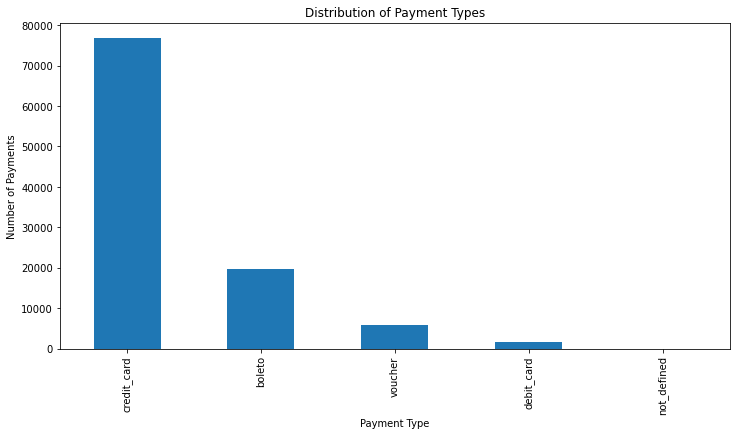

In [59]:
# Plotting the distribution of payment types
payments['payment_type'].value_counts().plot(kind='bar', figsize=(12,6))
plt.title("Distribution of Payment Types")
plt.xlabel("Payment Type")
plt.ylabel("Number of Payments")
plt.show()

In [60]:
print("\nReviews")
reviews.shape


Reviews


(99224, 7)

In [61]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [62]:
reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [63]:
# drop the columns don't want to use
reviews.drop('review_comment_title', axis=1, inplace=True)
reviews.drop('review_comment_message', axis=1, inplace=True)

In [64]:
reviews.duplicated().sum()

0

In [65]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_creation_date     99224 non-null  object
 4   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [66]:
reviews.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


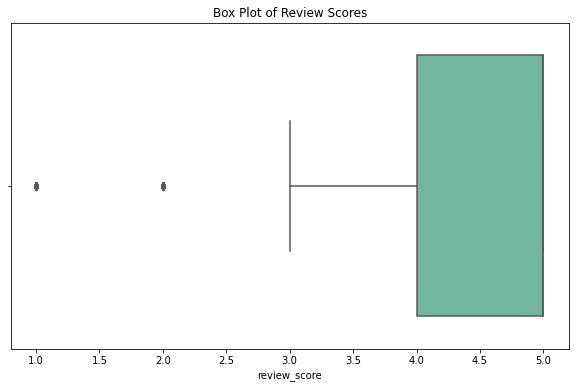

In [67]:
# Box plot for review_score
plt.figure(figsize=(10,6))
sns.boxplot(data=reviews, x='review_score', palette="Set2")
plt.title("Box Plot of Review Scores")
plt.show()

In [68]:
# ------- 6 orders
print("\nOrders")
# convert the date time to dataframe timestamp
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

orders.shape


Orders


(99441, 8)

In [69]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [70]:
orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [71]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [72]:
orders = orders.dropna()

In [73]:
orders.duplicated().sum()

0

In [74]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


In [75]:
orders.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,96461,96461,96461,96461,96461
mean,2018-01-01 23:53:26.642249216,2018-01-02 10:10:06.480142336,2018-01-05 05:21:04.508827392,2018-01-14 13:17:13.228102400,2018-01-25 17:33:14.236012544
min,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00
25%,2017-09-14 09:28:28,2017-09-14 14:30:14,2017-09-18 16:52:19,2017-09-25 22:31:59,2017-10-05 00:00:00
50%,2018-01-20 19:59:42,2018-01-22 13:49:00,2018-01-24 16:19:03,2018-02-02 19:50:56,2018-02-16 00:00:00
75%,2018-05-05 18:33:24,2018-05-06 10:30:49,2018-05-08 14:33:00,2018-05-15 23:08:54,2018-05-28 00:00:00
max,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00


order_status
delivered    96455
canceled         6
Name: count, dtype: int64


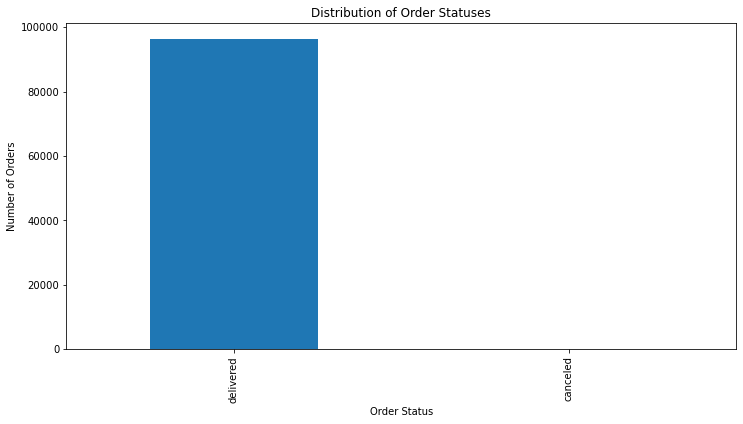

In [76]:
print(orders['order_status'].value_counts())

# Plotting distribution of order statuses
orders['order_status'].value_counts().plot(kind='bar', figsize=(12,6))
plt.title("Distribution of Order Statuses")
plt.xlabel("Order Status")
plt.ylabel("Number of Orders")
plt.show()

In [77]:
# ----- products
print("\nProduct")

# Replace the 'product_category_name' values with the English translation
products['product_category_name'].replace(translation_map, inplace=True)

products.shape


Product


(32951, 9)

In [78]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [79]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [80]:
# drop the useless columns 
products.drop('product_name_lenght', axis=1, inplace=True)
products.drop('product_description_lenght', axis=1, inplace=True)
products.drop('product_photos_qty', axis=1, inplace=True)

In [81]:
products.isna().sum()

product_id                 0
product_category_name    610
product_weight_g           2
product_length_cm          2
product_height_cm          2
product_width_cm           2
dtype: int64

In [82]:
# drop the null product
products = products.dropna()

In [83]:
# check the duplicate products
products.duplicated().sum()

0

In [84]:
products.product_category_name.unique()

array(['perfumery', 'art', 'sports_leisure', 'baby', 'housewares',
       'musical_instruments', 'cool_stuff', 'furniture_decor',
       'home_appliances', 'toys', 'bed_bath_table',
       'construction_tools_safety', 'computers_accessories',
       'health_beauty', 'luggage_accessories', 'garden_tools',
       'office_furniture', 'auto', 'electronics', 'fashion_shoes',
       'telephony', 'stationery', 'fashion_bags_accessories', 'computers',
       'home_construction', 'watches_gifts',
       'construction_tools_construction', 'pet_shop', 'small_appliances',
       'agro_industry_and_commerce', 'furniture_living_room',
       'signaling_and_security', 'air_conditioning', 'consoles_games',
       'books_general_interest', 'costruction_tools_tools',
       'fashion_underwear_beach', 'fashion_male_clothing',
       'kitchen_dining_laundry_garden_furniture',
       'industry_commerce_and_business', 'fixed_telephony',
       'construction_tools_lights', 'books_technical',
       'home_app

In [85]:
products.product_category_name.nunique()

73

In [86]:
products.product_category_name.duplicated()


0        False
1        False
2        False
3        False
4        False
         ...  
32946     True
32947     True
32948     True
32949     True
32950     True
Name: product_category_name, Length: 32340, dtype: bool

In [87]:
products.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32340 entries, 0 to 32950
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             32340 non-null  object 
 1   product_category_name  32340 non-null  object 
 2   product_weight_g       32340 non-null  float64
 3   product_length_cm      32340 non-null  float64
 4   product_height_cm      32340 non-null  float64
 5   product_width_cm       32340 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.7+ MB


In [88]:
products.describe()

,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32340.000000,32340.000000,32340.000000,32340.000000
mean,2276.956586,30.854545,16.958813,23.208596
std,4279.291845,16.955965,13.636115,12.078762
min,0.000000,7.000000,2.000000,6.000000
25%,300.000000,18.000000,8.000000,15.000000
50%,700.000000,25.000000,13.000000,20.000000
75%,1900.000000,38.000000,21.000000,30.000000
max,40425.000000,105.000000,105.000000,118.000000


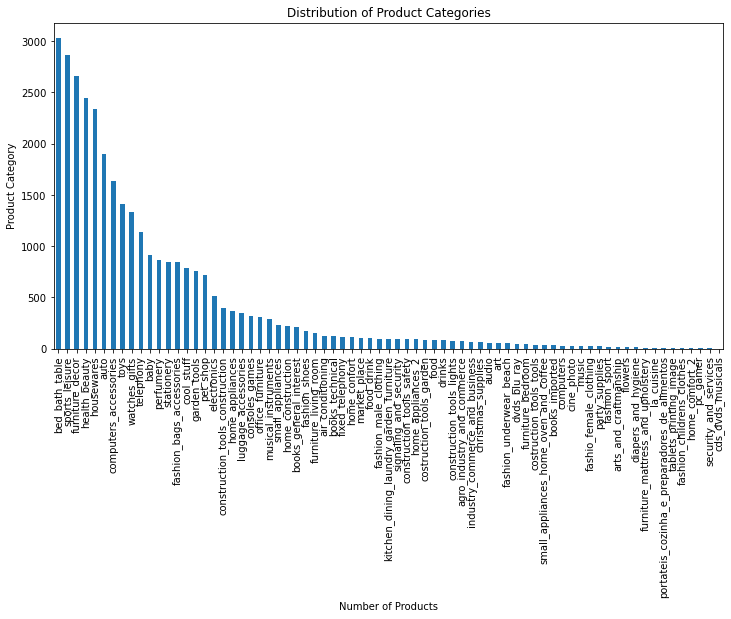

In [118]:
# Plotting distribution of product categories
# Sort product categories by count and plot
sorted_categories = products['product_category_name'].value_counts().sort_values(ascending=False)
sorted_categories.plot(kind='bar', figsize=(12,6))  # Use 'barh' for horizontal bars
plt.title("Distribution of Product Categories")
plt.ylabel("Product Category")
plt.xlabel("Number of Products")
plt.show()

In [121]:
sorted_categories

product_category_name
bed_bath_table               3029
sports_leisure               2867
furniture_decor              2657
health_beauty                2444
housewares                   2335
                             ... 
fashion_childrens_clothes       5
home_comfort_2                  5
pc_gamer                        3
security_and_services           2
cds_dvds_musicals               1
Name: count, Length: 73, dtype: int64

In [90]:
# ------- 8 sellers
print("\nSeller")
sellers.shape


Seller


(3095, 4)

In [91]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,São Paulo
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,São Paulo
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,Rio de Janeiro
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,São Paulo
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,São Paulo


In [92]:
sellers.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [93]:
sellers = sellers.dropna()

In [94]:
sellers.duplicated().sum()

0

In [95]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [96]:
sellers.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


Text(0.5, 0, 'Number of Sellers')

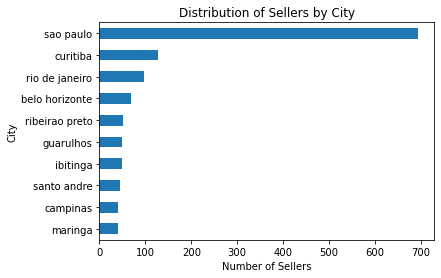

In [97]:
# to find the distribution of sellers based on their city
sellers.groupby(['seller_city'])['seller_id'].nunique().sort_values(ascending=False)[:10].iloc[::-1].plot(kind = 'barh')
plt.title("Distribution of Sellers by City")
plt.ylabel("City")
plt.xlabel("Number of Sellers")

Text(0.5, 0, 'Number of Sellers')

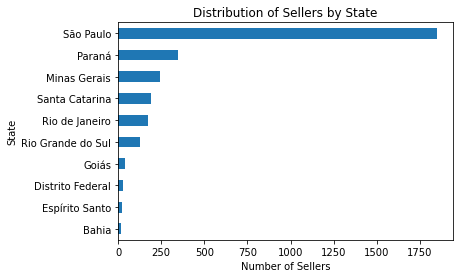

In [98]:
# to find the distribution of sellers based on their state
sellers.groupby(['seller_state'])['seller_id'].nunique().sort_values(ascending=False)[:10].iloc[::-1].plot(kind = 'barh')
plt.title("Distribution of Sellers by State")
plt.ylabel("State")
plt.xlabel("Number of Sellers")

In [99]:
# merge data to carry out the objectives